In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sys.path.insert(0, os.path.join(os.getcwd(), "..", "src", "data"))
from DataLoader import DataLoader

In [3]:
d_train = DataLoader()
d_train.papers(
    ["2008", "2009", "2010", "2011", "2012", "2013", "2014"]).conferences().conferenceseries().abstracts().citations()

d_validation = DataLoader()
d_validation.papers(["2015"]).conferences().conferenceseries().abstracts().citations()

d_test = DataLoader()
d_test.papers(["2016"]).conferences().conferenceseries().abstracts().citations()

d_train.data.drop(
    list(d_train.data[pd.isnull(d_train.data.chapter_title)].index),
    inplace=True
)
d_train.data.drop(
    list(d_train.data[pd.isnull(d_train.data.chapter_abstract)].index),
    inplace=True
)
d_train.data.drop(
    list(d_train.data[pd.isnull(d_train.data.chapter_citations)].index),
    inplace=True
)

d_validation.data.drop(
    list(d_validation.data[pd.isnull(d_validation.data.chapter_title)].index),
    inplace=True
)
d_validation.data.drop(
    list(d_validation.data[pd.isnull(d_validation.data.chapter_abstract)].index),
    inplace=True
)
d_validation.data.drop(
    list(d_validation.data[pd.isnull(d_validation.data.chapter_citations)].index),
    inplace=True
)

d_test.data.drop(
    list(d_test.data[pd.isnull(d_test.data.chapter_title)].index),
    inplace=True
)
d_test.data.drop(
    list(d_test.data[pd.isnull(d_test.data.chapter_abstract)].index),
    inplace=True
)
d_test.data.drop(
    list(d_test.data[pd.isnull(d_test.data.chapter_citations)].index),
    inplace=True
)

Process 'chapters_books' not in memory yet.
Process 'chapters_title' not in memory yet.
Process 'chapters_language' not in memory yet.
Process 'chapters_year' not in memory yet.
Process 'books_conferences' not in memory yet.
Process 'conferences_acronym' not in memory yet.
Process 'conferences_city' not in memory yet.
Process 'conferences_country' not in memory yet.
Process 'conferences_datestart' not in memory yet.
Process 'conferences_dateend' not in memory yet.
Process 'conferences_name' not in memory yet.
Process 'conferences_year' not in memory yet.
Process 'conferences_conferenceseries' not in memory yet.
Process 'conferenceseries_name' not in memory yet.
Process 'chapters_abstract' not in memory yet.
Process 'chapters_scigraph_citations' not in memory yet.
Process 'chapters_books' not in memory yet.
Process 'chapters_title' not in memory yet.
Process 'chapters_language' not in memory yet.
Process 'chapters_year' not in memory yet.
Process 'books_conferences' not in memory yet.
P

## Training vs. Validation vs. Test

In [4]:
print("Training data: {} papers.".format(len(d_train.data)))
print("Validation data: {} papers.".format(len(d_validation.data)))
print("Test data: {} papers.".format(len(d_test.data)))

Training data: 118112 papers.
Validation data: 10607 papers.
Test data: 17609 papers.


## Conferences

In [7]:
conferences_train = d_train.data.conference_name.unique()
conferences_validation = d_validation.data.conference_name.unique()
conferences_test = d_test.data.conference_name.unique()

intersect_train_validation = set(conferences_train).intersection(set(conferences_validation))
intersect_train_test = set(conferences_train).intersection(set(conferences_test))
intersect_validation_test = set(conferences_validation).intersection(set(conferences_test))

count_train = len(conferences_train)
count_validation = len(conferences_validation)
count_test = len(conferences_test)

count_intersect_train_validation = len(intersect_train_validation)
count_intersect_train_test = len(intersect_train_test)
count_intersect_validation_test = len(intersect_validation_test)

print("Conferences in training set: {}".format(count_train))
print("Conferences in validation set: {}".format(count_validation))
print("Conferences in test set: {}".format(count_test))

print("Conferences in intersection train-validation: {}, Proportion: {}".format(
count_intersect_train_validation, round(count_intersect_train_validation/count_validation, 2)))
print("Conferences in intersection train-test: {}, Proportion: {}".format(
count_intersect_train_test, round(count_intersect_train_test/count_test, 2)))
print("Conferences in intersection validation-test: {}, Proportion: {}".format(
count_intersect_validation_test, round(count_intersect_validation_test/count_test, 2)))

Conferences in training set: 985
Conferences in validation set: 314
Conferences in test set: 525
Conferences in intersection train-validation: 259, Proportion: 0.82
Conferences in intersection train-test: 365, Proportion: 0.7
Conferences in intersection validation-test: 177, Proportion: 0.34


## Conference Series

In [8]:
conferenceseries_train = d_train.data.conferenceseries_name.unique()
conferenceseries_validation = d_validation.data.conferenceseries_name.unique()
conferenceseries_test = d_test.data.conferenceseries_name.unique()

intersect_train_validation = set(conferenceseries_train).intersection(set(conferenceseries_validation))
intersect_train_test = set(conferenceseries_train).intersection(set(conferenceseries_test))
intersect_validation_test = set(conferenceseries_validation).intersection(set(conferenceseries_test))

count_train = len(conferenceseries_train)
count_validation = len(conferenceseries_validation)
count_test = len(conferenceseries_test)

count_intersect_train_validation = len(intersect_train_validation)
count_intersect_train_test = len(intersect_train_test)
count_intersect_validation_test = len(intersect_validation_test)

print("Conference Series in training set: {}".format(count_train))
print("Conference Series in validation set: {}".format(count_validation))
print("Conference Series in test set: {}".format(count_test))

print("Conference Series in intersection train-validation: {}, Proportion: {}".format(
count_intersect_train_validation, round(count_intersect_train_validation/count_validation, 2)))
print("Conference Series in intersection train-test: {}, Proportion: {}".format(
count_intersect_train_test, round(count_intersect_train_test/count_test, 2)))
print("Conference Series in intersection validation-test: {}, Proportion: {}".format(
count_intersect_validation_test, round(count_intersect_validation_test/count_test, 2)))

Conference Series in training set: 890
Conference Series in validation set: 312
Conference Series in test set: 524
Conference Series in intersection train-validation: 266, Proportion: 0.85
Conference Series in intersection train-test: 393, Proportion: 0.75
Conference Series in intersection validation-test: 185, Proportion: 0.35


In [10]:
pd.set_option('display.max_colwidth', -1)
d_train.data[
    d_train.data.conferenceseries_name==conferences_train[0]][[
    "conference","conferenceseries_name","conference_name","conference_year"]]

,conference,conferenceseries_name,conference_name,conference_year
1,<http://scigraph.springernature.com/things/conferences/fbfc2cdaa2dd23299720d757f81ab835>,Conference on Biomimetic and Biohybrid Systems,Conference on Biomimetic and Biohybrid Systems,2012
3,<http://scigraph.springernature.com/things/conferences/fbfc2cdaa2dd23299720d757f81ab835>,Conference on Biomimetic and Biohybrid Systems,Conference on Biomimetic and Biohybrid Systems,2012
4,<http://scigraph.springernature.com/things/conferences/fbfc2cdaa2dd23299720d757f81ab835>,Conference on Biomimetic and Biohybrid Systems,Conference on Biomimetic and Biohybrid Systems,2012
5,<http://scigraph.springernature.com/things/conferences/fbfc2cdaa2dd23299720d757f81ab835>,Conference on Biomimetic and Biohybrid Systems,Conference on Biomimetic and Biohybrid Systems,2012
7,<http://scigraph.springernature.com/things/conferences/fbfc2cdaa2dd23299720d757f81ab835>,Conference on Biomimetic and Biohybrid Systems,Conference on Biomimetic and Biohybrid Systems,2012
8,<http://scigraph.springernature.com/things/conferences/fbfc2cdaa2dd23299720d757f81ab835>,Conference on Biomimetic and Biohybrid Systems,Conference on Biomimetic and Biohybrid Systems,2012
9,<http://scigraph.springernature.com/things/conferences/fbfc2cdaa2dd23299720d757f81ab835>,Conference on Biomimetic and Biohybrid Systems,Conference on Biomimetic and Biohybrid Systems,2012
10,<http://scigraph.springernature.com/things/conferences/fbfc2cdaa2dd23299720d757f81ab835>,Conference on Biomimetic and Biohybrid Systems,Conference on Biomimetic and Biohybrid Systems,2012
13,<http://scigraph.springernature.com/things/conferences/fbfc2cdaa2dd23299720d757f81ab835>,Conference on Biomimetic and Biohybrid Systems,Conference on Biomimetic and Biohybrid Systems,2012
19,<http://scigraph.springernature.com/things/conferences/fbfc2cdaa2dd23299720d757f81ab835>,Conference on Biomimetic and Biohybrid Systems,Conference on Biomimetic and Biohybrid Systems,2012


## Conference Series per Year

In [11]:
d_2008 = DataLoader()
d_2008.training_data_with_abstracts_citations(["2008"])

d_2009 = DataLoader()
d_2009.training_data_with_abstracts_citations(["2009"])

d_2010 = DataLoader()
d_2010.training_data_with_abstracts_citations(["2010"])

d_2011 = DataLoader()
d_2011.training_data_with_abstracts_citations(["2011"])

d_2012 = DataLoader()
d_2012.training_data_with_abstracts_citations(["2012"])

d_2013 = DataLoader()
d_2013.training_data_with_abstracts_citations(["2013"])

d_2014 = DataLoader()
d_2014.training_data_with_abstracts_citations(["2014"])

d_2015 = DataLoader()
d_2015.validation_data_with_abstracts_citations()

d_2016 = DataLoader()
d_2016.test_data_with_abstracts_citations()

Process 'chapters_books' not in memory yet.
Process 'chapters_title' not in memory yet.
Process 'chapters_language' not in memory yet.
Process 'chapters_year' not in memory yet.
Process 'books_conferences' not in memory yet.
Process 'conferences_acronym' not in memory yet.
Process 'conferences_city' not in memory yet.
Process 'conferences_country' not in memory yet.
Process 'conferences_datestart' not in memory yet.
Process 'conferences_dateend' not in memory yet.
Process 'conferences_name' not in memory yet.
Process 'conferences_year' not in memory yet.
Process 'conferences_conferenceseries' not in memory yet.
Process 'conferenceseries_name' not in memory yet.
Process 'chapters_abstract' not in memory yet.
Process 'chapters_scigraph_citations' not in memory yet.
Process 'chapters_books' not in memory yet.
Process 'chapters_title' not in memory yet.
Process 'chapters_language' not in memory yet.
Process 'chapters_year' not in memory yet.
Process 'books_conferences' not in memory yet.
P

In [18]:
cs_2008 = pd.DataFrame({"year": ["2008"]*len(d_2008.data["conferenceseries"]),
                       "conferenceseries": list(d_2008.data["conferenceseries"])})
cs_2009 = pd.DataFrame({"year": ["2009"]*len(d_2009.data["conferenceseries"]),
                       "conferenceseries": list(d_2009.data["conferenceseries"])})
cs_2010 = pd.DataFrame({"year": ["2010"]*len(d_2010.data["conferenceseries"]),
                       "conferenceseries": list(d_2010.data["conferenceseries"])})
cs_2011 = pd.DataFrame({"year": ["2011"]*len(d_2011.data["conferenceseries"]),
                       "conferenceseries": list(d_2011.data["conferenceseries"])})
cs_2012 = pd.DataFrame({"year": ["2012"]*len(d_2012.data["conferenceseries"]),
                       "conferenceseries": list(d_2012.data["conferenceseries"])})
cs_2013 = pd.DataFrame({"year": ['2013']*len(d_2013.data["conferenceseries"]),
                        "conferenceseries": list(d_2013.data["conferenceseries"])})
cs_2014 = pd.DataFrame({"year": ['2014']*len(d_2014.data["conferenceseries"]),
                        "conferenceseries": list(d_2014.data["conferenceseries"])})
cs_2015 = pd.DataFrame({"year": ['2015']*len(d_2015.data["conferenceseries"]),
                        "conferenceseries": list(d_2015.data["conferenceseries"])})
cs_2016 = pd.DataFrame({"year": ['2016']*len(d_2016.data["conferenceseries"]),
                        "conferenceseries": list(d_2016.data["conferenceseries"])})
cs = pd.concat([cs_2008, cs_2009, cs_2010, cs_2011, cs_2012, cs_2013, cs_2014, cs_2015, cs_2016])

In [22]:
years = sorted(set(cs["year"]))
cs_all = set()
new = []
repeated = []
total = []
for year in years:
    current = set(cs["conferenceseries"].loc[cs["year"]==year])
    new.append([year, len(current.difference(cs_all))])
    repeated.append([year, len(current)-len(current.difference(cs_all))])
    cs_all.update(current)
    total.append([year, len(current)])
cs_new  = pd.DataFrame(new, columns = ["Year", "No_conferenceseries"])
cs_repeated = pd.DataFrame(repeated, columns = ["Year", "No_conferenceseries"])
cs_total = pd.DataFrame(total, columns = ["Year", "No_conferenceseries"])

In [23]:
print(cs_total)

   Year  No_conferenceseries
0  2008  389                
1  2009  444                
2  2010  465                
3  2011  488                
4  2012  495                
5  2013  513                
6  2014  502                
7  2015  313                
8  2016  525                


In [24]:
print("Mean number of unique conference series per year: {}".format(cs_total.mean()[1]))
print("Median number of conference series per year: {}".format(cs_total.median()[1]))

Mean number of unique conference series per year: 459.3333333333333
Median number of conference series per year: 488.0


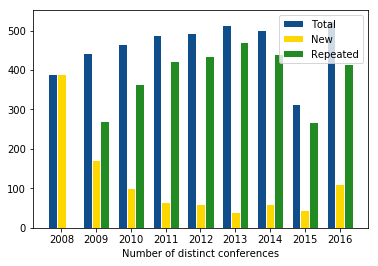

In [25]:
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = list(cs_total["No_conferenceseries"])
bars2 = list(cs_new["No_conferenceseries"])
bars3 = list(cs_repeated["No_conferenceseries"])
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#104E8B', width=barWidth, edgecolor='white', label='Total')
plt.bar(r2, bars2, color='#FFD700', width=barWidth, edgecolor='white', label='New')
plt.bar(r3, bars3, color='#228B22', width=barWidth, edgecolor='white', label='Repeated')
 
# Add xticks on the middle of the group bars
plt.xlabel('Number of distinct conferences')
plt.xticks([r + barWidth for r in range(len(bars1))], list(years))
 
# Create legend & Show graphic
plt.legend(loc="best")
plt.show()

## Number of Papers per Conference

In [27]:
df = d_train.data[["chapter","conference_name"]].groupby(["conference_name"]).count()
print("Mean number of papers per conference: {}".format(df.mean()[0]))
print("Median number of papers per conference: {}".format(df.median()[0]))

Mean number of papers per conference: 120.01727642276423
Median number of papers per conference: 72.0


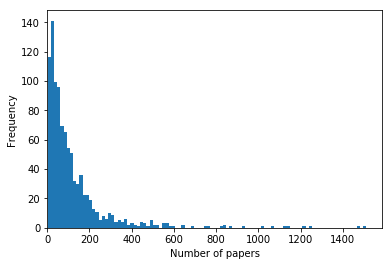

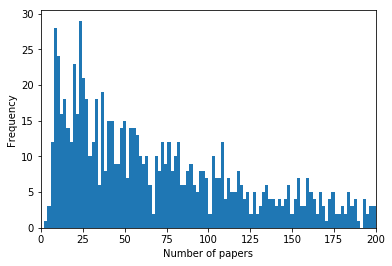

In [28]:
ax = d_train.data[["chapter","conference_name"]].groupby(["conference_name"]).count().plot(kind="hist",bins=100)
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0)
plt.xlabel("Number of papers")
ax.legend().remove()
plt.show()

ax = d_train.data[["chapter","conference_name"]].groupby(["conference_name"]).count().plot(kind="hist",bins=800)
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0,xmax=200)
plt.xlabel("Number of papers")
ax.legend().remove()
plt.show()

In [29]:
d_train.data[["chapter","conference_name"]].groupby(["conference_name"]).count().sort_values(
    by="chapter", ascending=False)

,chapter
conference_name,
International Conference on Neural Information Processing,1510
European Conference on Computer Vision,1468
International Conference on Medical Image Computing and Computer-Assisted Intervention,1249
International Conference on Computational Science and Its Applications,1217
Iberoamerican Congress on Pattern Recognition,1135
International Conference on Intelligent Computing,1130
International Conference on Human-Computer Interaction,1058
International Symposium on Visual Computing,1015
International Conference on Advanced Information Systems Engineering,933


In [21]:
d_train.data[
    d_train.data.conference_name == "International Conference on Neural Information Processing"][[
    "chapter_title","conference_year"]
]

,chapter_title,conference_year
2768,Synchronization Transition in a Pair of Coupled Non-identical Oscillators,2008
2769,Bio-signal Integration for Humanoid Operation: Gesture and Brain Signal Recognition by HMM/SVM-Embedded BN,2008
2770,Improved Sparse Bump Modeling for Electrophysiological Data,2008
2771,Online Multibody Factorization Based on Bayesian Principal Component Analysis of Gaussian Mixture Models,2008
2772,Solving the Online SLAM Problem with an Omnidirectional Vision System,2008
2773,Bifurcation between Superstable Periodic Orbits and Chaos in a Simple Spiking Circuit,2008
2774,"Sensibility-Aware Image Retrieval Using Computationally Learned Bases: RIM, JPG, J2K, and Their Mixtures",2008
2775,Neural Mechanism of Synchronous Firing of Inferior Temporal Cortex in Face Perception,2008
2776,Prediction of the O-Glycosylation by Support Vector Machines and Semi-supervised Learning,2008
2777,A Neural Network Model for Sequential Multitask Pattern Recognition Problems,2008


## Number of Papers per Conference Series

In [30]:
df = d_train.data[["chapter", "conferenceseries"]].groupby(["conferenceseries"]).count()
print("Mean number of papers per conference series: {}".format(df.mean()[0]))
print("Median number of papers per conference series: {}".format(df.median()[0]))

Mean number of papers per conference series: 132.5611672278339
Median number of papers per conference series: 83.0


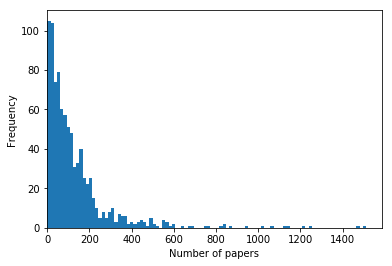

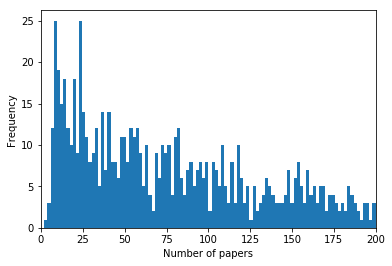

In [31]:
ax = d_train.data[["chapter","conferenceseries"]].groupby(["conferenceseries"]).count().plot(kind="hist",bins=100)
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0)
plt.xlabel("Number of papers")
ax.legend().remove()
plt.show()

ax = d_train.data[["chapter","conferenceseries"]].groupby(["conferenceseries"]).count().plot(kind="hist",bins=800)
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0,xmax=200)
plt.xlabel("Number of papers")
ax.legend().remove()
plt.show()

In [32]:
d_train.data[["chapter","conferenceseries_name"]].groupby(["conferenceseries_name"]).count().sort_values(
    by="chapter", ascending=False)

,chapter
conferenceseries_name,
International Conference on Neural Information Processing,1510
European Conference on Computer Vision,1468
International Conference on Medical Image Computing and Computer-Assisted Intervention,1249
International Conference on Computational Science and Its Applications,1217
Iberoamerican Congress on Pattern Recognition,1135
International Conference on Intelligent Computing,1130
International Conference on Human-Computer Interaction,1058
International Symposium on Visual Computing,1015
"Workshop on Ontology, Conceptualization and Epistemology for Information Systems, Software Engineering and service Science",941


## Conference vs. Conference Series

In [33]:
df = d_train.data[["conference","conferenceseries"]].drop_duplicates()
df.groupby("conferenceseries").count().reset_index() \
    .merge(df,on=["conferenceseries","conferenceseries"]) \
    .sort_values(by=["conference_x","conferenceseries"],ascending=False)

,conferenceseries,conference_x,conference_y
1330,<http://scigraph.springernature.com/things/conference-series/6762fbfb6c8bb960c672ad938815fe5e>,9,<http://scigraph.springernature.com/things/conferences/367a4faaa8451932a05a1d55f63750a7>
1331,<http://scigraph.springernature.com/things/conference-series/6762fbfb6c8bb960c672ad938815fe5e>,9,<http://scigraph.springernature.com/things/conferences/99193eef6242a7447d23bc9ba83576ba>
1332,<http://scigraph.springernature.com/things/conference-series/6762fbfb6c8bb960c672ad938815fe5e>,9,<http://scigraph.springernature.com/things/conferences/e77f7cd1c343f9b6ce694faaa57c0dee>
1333,<http://scigraph.springernature.com/things/conference-series/6762fbfb6c8bb960c672ad938815fe5e>,9,<http://scigraph.springernature.com/things/conferences/4b603f7a7c19273e2e2510458bf509f5>
1334,<http://scigraph.springernature.com/things/conference-series/6762fbfb6c8bb960c672ad938815fe5e>,9,<http://scigraph.springernature.com/things/conferences/d2a6cf3d6976200a8c05e8d4fcb73ee0>
1335,<http://scigraph.springernature.com/things/conference-series/6762fbfb6c8bb960c672ad938815fe5e>,9,<http://scigraph.springernature.com/things/conferences/a19acbeab83710a09eacc6a35041beaa>
1336,<http://scigraph.springernature.com/things/conference-series/6762fbfb6c8bb960c672ad938815fe5e>,9,<http://scigraph.springernature.com/things/conferences/2c5c253a8323f232e2b72ce4e91a06be>
1337,<http://scigraph.springernature.com/things/conference-series/6762fbfb6c8bb960c672ad938815fe5e>,9,<http://scigraph.springernature.com/things/conferences/a542e9ba9b959b4f18c9179e074076db>
1338,<http://scigraph.springernature.com/things/conference-series/6762fbfb6c8bb960c672ad938815fe5e>,9,<http://scigraph.springernature.com/things/conferences/c2dce422ca33a98e4dcc1de473caea05>
1263,<http://scigraph.springernature.com/things/conference-series/623cd4c8948a0c89d2751cfb253660b6>,9,<http://scigraph.springernature.com/things/conferences/eda35f87b6d9fcb3503c13e1a595614f>


## Conference name vs. Conference Series

In [34]:
df = d_train.data[["conference","conferenceseries"]].drop_duplicates()
df.groupby("conference").count().reset_index() \
    .merge(df,on=["conference","conference"],how="left") \
    .sort_values(by=["conferenceseries_x","conference"],ascending=False)

,conference,conferenceseries_x,conferenceseries_y
3399,<http://scigraph.springernature.com/things/conferences/ffbfc67fafa80986346ca4233ca267fb>,1,<http://scigraph.springernature.com/things/conference-series/2d1ce4ce6a94399b04c2a11fc14e3d46>
3398,<http://scigraph.springernature.com/things/conferences/ffbe0fb5cd308faf5bb01d9e638c2a3f>,1,<http://scigraph.springernature.com/things/conference-series/654dc2a6e890a6c997d96bfba035b0c2>
3397,<http://scigraph.springernature.com/things/conferences/ff905c09d6ea7461a1044586d0eb6c83>,1,<http://scigraph.springernature.com/things/conference-series/3781fa3d600fbdea80651217c290c600>
3396,<http://scigraph.springernature.com/things/conferences/ff8b0a9fcb481a9bc53e950e74dedd66>,1,<http://scigraph.springernature.com/things/conference-series/6bea6072d4c6a820160a477bf7af4d73>
3395,<http://scigraph.springernature.com/things/conferences/ff89a6569ca062c819888d121a9a75e4>,1,<http://scigraph.springernature.com/things/conference-series/c31938229d609335077a9d50c444cf88>
3394,<http://scigraph.springernature.com/things/conferences/ff4fe24edae9b05523a2e8c0b76dbd91>,1,<http://scigraph.springernature.com/things/conference-series/f2174d21a194367587701e3e91d82ce6>
3393,<http://scigraph.springernature.com/things/conferences/ff3d3606f647e9ae3c029b0913c8c458>,1,<http://scigraph.springernature.com/things/conference-series/914754c1ab56fcd8a2fa97cd716b2aa5>
3392,<http://scigraph.springernature.com/things/conferences/ff17190e5ee88a5a88715c372759b9e7>,1,<http://scigraph.springernature.com/things/conference-series/59dc95fca89abcc61ba4a2fb536317d1>
3391,<http://scigraph.springernature.com/things/conferences/ff067e38d246e49cfdcf8f0f0a2e1b29>,1,<http://scigraph.springernature.com/things/conference-series/525f13025bf376e4ce3ad56f75765d53>
3390,<http://scigraph.springernature.com/things/conferences/fefe41269426e14252f56236977ca5af>,1,<http://scigraph.springernature.com/things/conference-series/027f273bdac97734f63bde4cbdd92c85>
